##The CIFAR 10 Dataset

Packages that are needed:

In [91]:
from __future__ import print_function

import numpy as np
import pandas as pd 
import pickle
import os
import sklearn
import re
from scipy import ndimage, misc
import cv2
import pickle
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

import keras
from keras.datasets import cifar10
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import requests
import tarfile


The next downloads the CIFAR 10 package.

In [92]:
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
r = requests.get(url, allow_redirects=True)
open('cifar-10-python.tar.gz', 'wb').write(r.content)

170498071

In Google Colab, that Cifar 10 package, a tar.gz file, gets downloaded in the "/content/" directory, please adjust in case you do not use Google Colab and it was downloaded in another folder.

In [93]:
tf = tarfile.open("/content/cifar-10-python.tar.gz")
tf.extractall()

The "unpickle" function, as defined on the CIFAR homepage (https://www.cs.toronto.edu/~kriz/cifar.html):


In [94]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Unpickling batches of training data and separating pixel values and labels into different dataframes.

In [95]:
pd_tr = pd.DataFrame()
tr_y = pd.DataFrame()
for i in range(1,6):
    data = unpickle('/content/cifar-10-batches-py/data_batch_' + str(i)) 
    pd_tr = pd_tr.append(pd.DataFrame(data[b'data']))
    tr_y = tr_y.append(pd.DataFrame(data[b'labels']))
pd_tr['labels'] = tr_y
pd_tr.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,...,30,11,0,57,94,34,34,116,94,87,67,68,76,72,70,79,82,86,92,94,92,84,90,93,91,83,77,69,55,59,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,...,77,58,52,73,96,120,131,120,122,133,125,32,12,19,70,122,107,99,91,62,30,20,21,42,48,28,11,11,12,22,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,...,67,68,76,78,73,75,82,105,98,94,88,87,86,86,89,91,92,88,89,86,85,91,94,95,94,92,90,86,78,78,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,...,70,68,68,66,53,49,55,56,53,53,61,61,59,61,44,40,49,53,56,58,57,62,74,62,58,55,67,54,66,53,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,188,183,182,184,184,180,177,177,177,176,175,175,173,170,169,168,166,163,163,162,158,157,168,172,171,166,171,174,177,179,...,77,75,73,79,83,78,78,78,79,76,75,82,84,84,89,87,92,93,97,96,98,99,101,102,102,101,102,99,97,92,88,85,82,83,79,78,82,78,80,1


In [96]:
pd_tr = shuffle(pd_tr)
pd_tr.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
2980,130,129,122,112,105,105,78,46,40,37,31,28,20,24,104,55,13,26,30,29,23,21,16,16,15,14,13,21,42,59,68,111,194,191,191,187,178,170,166,159,...,75,68,85,88,87,96,95,73,70,71,78,73,89,98,87,110,109,95,105,110,91,95,118,131,135,153,143,132,130,117,110,122,95,94,91,81,91,92,98,7
6486,149,143,139,136,134,132,129,125,123,125,127,131,136,141,144,143,142,142,141,140,139,119,95,108,128,124,119,117,113,109,104,100,144,138,134,132,129,126,122,120,...,123,151,119,128,129,145,150,106,102,104,88,48,67,107,95,70,57,82,88,54,88,132,105,94,91,95,120,95,113,145,152,121,148,137,132,154,129,121,154,6
846,253,248,250,250,247,243,240,234,225,214,190,189,209,222,230,238,244,248,250,249,247,247,250,249,248,245,243,243,242,240,239,240,233,234,240,239,225,213,206,196,...,52,49,48,49,51,75,107,78,80,87,93,94,99,101,102,100,98,88,75,70,67,58,56,56,68,78,78,79,77,75,67,67,63,62,61,55,53,71,103,8
8456,229,213,197,206,228,231,214,211,230,240,223,210,220,232,221,208,216,234,226,207,217,239,237,229,244,251,242,235,239,246,243,235,214,205,201,208,221,224,216,214,...,193,197,217,211,194,179,163,160,163,174,181,194,204,207,213,216,218,222,227,228,226,230,233,233,230,228,225,219,214,210,205,198,189,173,161,151,138,127,109,1
2306,4,5,6,5,4,4,4,4,4,4,5,5,4,4,4,4,3,3,3,3,4,2,1,10,60,23,0,3,5,2,2,2,4,4,5,4,4,4,4,4,...,0,2,2,2,1,1,0,3,2,2,2,4,30,32,53,57,50,40,24,23,35,34,33,32,35,40,43,32,32,36,51,17,0,2,1,1,1,1,1,8


In [97]:
tr_x = np.asarray(pd_tr.iloc[:, :3072]).astype(np.float64)
ts_x = np.asarray(unpickle('/content/cifar-10-batches-py/test_batch')[b'data']).astype(np.float64)
ytr = np.asarray(pd_tr['labels'])
yts = np.asarray(unpickle('/content/cifar-10-batches-py/test_batch')[b'labels'])
tr_x.shape

(50000, 3072)

The above number can be calculated as 32(breadth) x 32(width) x 3(color channels) x 10000 (images per batch) x 5 (number of training batches)

### Exploring the dataset

Taking the label names from batches.meta and checking the categories of the images in the dataset.

In [98]:
labels = unpickle('/content/cifar-10-batches-py/batches.meta')[b'label_names']
labels

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [99]:
print(tr_x[120])

[110. 112. 132. ... 140. 134. 129.]


In the next step the plt function from Matlab is used:

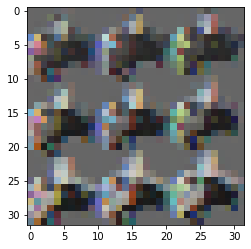

In [100]:
plt.imshow((tr_x[113]/255).reshape(32,32,3))

If you look carefully, you can maybe recognize a shape, maybe an animal, and it is repeated around 9 times. This is because the reshaping was not done depth-wise. So we need to stack the array by separating the red, green and blue arrays and stacking them depth-wise. The below function takes a flattened array from the dataset and plots the RGB image.

In [101]:
def plot_CIFAR(ind):
    arr = tr_x[ind]
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
    
    img = np.dstack((R,G,B))
    title = re.sub('[!@#$b]', '', str(labels[ytr[ind]]))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')
    ax.set_title('Category = '+ title,fontsize =15)

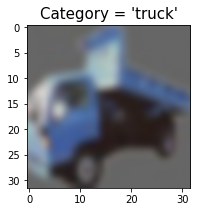

In [102]:
plot_CIFAR(113)

This is the most sharpened the CIFAR-10 images get. This is because the original image is 32px X 32px, which is a lot smaller than the above image. 

### Normalizing 

Normalizing features (image pixels here) is an important pre-processing step in the learning process as it standardizes the features, implicitly letting the weights be considered equally.

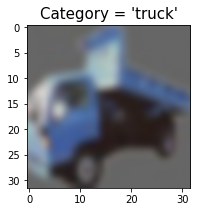

In [103]:
mean_tr = tr_x.mean(axis=0)
mean_ts = tr_x.mean(axis=0)
std_tr  = tr_x.std(axis=0)
std_ts  = ts_x.std(axis=0)

xtr = (tr_x-mean_tr.T)/(std_tr.T)
xts = (ts_x-mean_ts.T)/(std_ts.T)

plot_CIFAR(113)

The original pnn.ipynb was now looking more closely into the training procedure, but as it we just wanted in this file to access the actual imaging data, and 2. we could not make it run in Google Colab, we end this Jupyter Notebook here. Visit https://github.com/pranka02/nn_CIFAR10.git for the original pnn.ipynb file.

##Let's take a look at the dataset with the Cifar10.load_data() function:

In [80]:

#The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

trainimages=(x_train)
testimages=(x_test)
traincategorylabels=(y_train)
testcategorylabels=(y_test)

print(keras.backend.image_data_format())


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
channels_last




Lets take a closer look at the actual image data (train and test) without the labels. It becomes clear that these are numpy.ndarrays datatypes.

In [81]:
(x_train, x_test) = cifar10.load_data()

allpictures =(x_train, x_test)

print(type(trainimages))
print(len(trainimages))
print(type(testimages))
print(len(testimages))
oneimage = testimages[1]
print(type(oneimage))
print(len(oneimage))
print(type(oneimage[1]))


<class 'numpy.ndarray'>
50000
<class 'numpy.ndarray'>
10000
<class 'numpy.ndarray'>
32
<class 'numpy.ndarray'>


Let's take a look the label data:

In [82]:
print(type(traincategorylabels))
print(len(traincategorylabels))
print(type(traincategorylabels[1]))
print(len(traincategorylabels[1]))
print(traincategorylabels[1])
print(traincategorylabels[2])
print(traincategorylabels[3])

<class 'numpy.ndarray'>
50000
<class 'numpy.ndarray'>
1
[9]
[9]
[4]


Let's print all the labels of the training data:

In [83]:
print(traincategorylabels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Let's create a histogramm, to quickly check if we have an even distributed amount of each label types:

In [84]:
print(len(traincategorylabels))
print(np.histogram(np.transpose(traincategorylabels), bins = [0,1,2,3,4,5,6,7,8,9,10]))
print(len(testcategorylabels))
print(np.histogram(np.transpose(testcategorylabels), bins = [0,1,2,3,4,5,6,7,8,9,10]))

50000
(array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
10000
(array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


It is already visible that for every category we have exactly 5000 examples in the training dataset and 1000 in the test dataset, but lets create a matplot to make it also visually visible. 

Total amount of data labels (training dataset):  50000


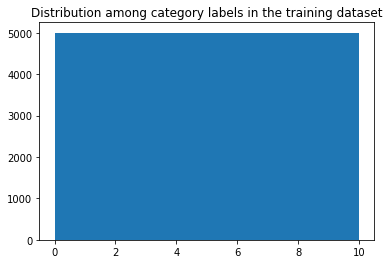

Total amount of data labels (test dataset):  10000


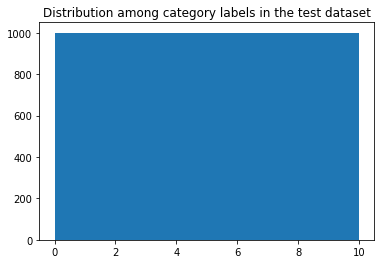

In [90]:
print("Total amount of data labels (training dataset): ", len(traincategorylabels))
plt.hist(traincategorylabels, bins = [0,1,2,3,4,5,6,7,8,9,10])
plt.title("Distribution among category labels in the training dataset")
plt.show()
print("Total amount of data labels (test dataset): ", len(testcategorylabels))
plt.hist(testcategorylabels, bins = [0,1,2,3,4,5,6,7,8,9,10])
plt.title("Distribution among category labels in the test dataset")
plt.show()

##Analyzing our picture data:

The image is stored in 
row-major order, so that the first 32 entries of the array are the red channel 
values of the first row of the image.
Source: https://www.cs.toronto.edu/~kriz/cifar.html



In [87]:
print("Analyzing our picture data")

print(type(oneimage))
print(len(oneimage))

print((oneimage))


Analyzing our picture data
<class 'numpy.ndarray'>
32
[[[235 235 235]
  [231 231 231]
  [232 232 232]
  ...
  [233 233 233]
  [233 233 233]
  [232 232 232]]

 [[238 238 238]
  [235 235 235]
  [235 235 235]
  ...
  [236 236 236]
  [236 236 236]
  [235 235 235]]

 [[237 237 237]
  [234 234 234]
  [234 234 234]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]

 ...

 [[ 87  99  89]
  [ 43  51  37]
  [ 19  23  11]
  ...
  [169 184 179]
  [182 197 193]
  [188 202 201]]

 [[ 82  96  82]
  [ 46  57  36]
  [ 36  44  22]
  ...
  [174 189 183]
  [185 200 196]
  [187 202 200]]

 [[ 85 101  83]
  [ 62  75  48]
  [ 58  67  38]
  ...
  [168 183 178]
  [180 195 191]
  [186 200 199]]]


first 32 entries of the array are the red channel values of the first row of 
the image.
print("first 32 entries of the array are the red channel values of the first row of the image.")


In [89]:
print(oneimage[0])
firstrowimage=oneimage[0]
print(len(firstrowimage))
print(firstrowimage[0])
print(firstrowimage[0]/255)

[[235 235 235]
 [231 231 231]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [233 233 233]
 [233 233 233]
 [233 233 233]
 [233 233 233]
 [233 233 233]
 [233 232 233]
 [233 231 233]
 [232 231 233]
 [231 233 233]
 [230 233 232]
 [232 232 234]
 [232 231 234]
 [232 232 232]
 [233 233 230]
 [232 233 231]
 [233 233 233]
 [232 232 232]
 [232 232 232]
 [232 232 232]
 [233 233 233]
 [233 233 233]
 [232 232 232]]
32
[235 235 235]
[0.92156863 0.92156863 0.92156863]


As it just the first row (red channel) it is not possible to create a picture of this.